# Basics of Zipline API for Trading

1) Creating Basic Framework of zipline code

2) Simulating simple trade strategy (long term strategy):

2.1) buy_ten_stock daily strategy (b_t_s)

2.2) Aroon (up/down) strategy (aroon)

2.3) Dual_moving_average_crossover strategy (d_m_a_c)

2.4) Diversified_portfolio strategy (d_p)


Note: Code could be executed automatically daily to get latest data and zipline portfolio trade strategy (changes made to zipline code so first and last date automatically extracted in datetime format from the stock data.

## 1)

## 2)

### 2.1) buy_ten_stock daily strategy (b_t_s)

In [1]:
# package to extract stock data from alpha_vantage API
from alpha_vantage.timeseries import TimeSeries

# package to plot 
import matplotlib.pyplot as plt

# package to check and set directory
import os

# package to use pandas DataFrame or Pandas
import pandas as pd

# packages to execute excel spreadsheet conversion function
import openpyxl
import xlrd

# Required to set datetimes for zipline algorithm later
import pytz

In [2]:
# get current directory
os.getcwd()

'C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1'

In [3]:
# set path as current directory
os.chdir('C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1')

In [4]:
# Execute functions with API keys
with open('ak.txt', 'r') as myFile:
    keys=myFile.read()
    ts=TimeSeries(key=keys, output_format='pandas')

In [5]:
# Extract data of interest('MSFT' stock this case)
# msft=Microsoft, cat=Caterpillar
# msft_day being data by msf OHLC data by daily basis, for long term startegy
# msft_intra being data by msf OHLC data by intraday basis(per 15 minute), for short term strategy

columns=['open', 'volume', 'low', 'close', 'high']
msft_day, meta_data=ts.get_daily(symbol='MSFT', outputsize='full')
msft_intra, meta_data=ts.get_intraday(symbol='MSFT',interval='5min', outputsize='full')
# Caterpillar stock data will be used later in Part 4
cat_day, meta_data=ts.get_daily(symbol='CAT', outputsize='full')
cat_intra, meta_data=ts.get_intraday(symbol='CAT', interval='5min', outputsize='full')

In [6]:
msft_day.head()

,1. open,5. volume,4. close,2. high,3. low
date,,,,,
2000-02-04,104.37,27682700.0,106.56,108.00,104.14
2000-02-07,106.81,20002900.0,106.62,106.87,104.25
2000-02-08,106.44,28114500.0,109.94,110.00,106.44
2000-02-09,109.44,27545000.0,104.00,109.44,103.87
2000-02-10,103.89,27263900.0,106.00,106.56,102.50


In [7]:
msft_intra.head()

,1. open,5. volume,4. close,2. high,3. low
date,,,,,
2020-01-16 09:35:00,164.3552,1134677.0,164.4327,164.7014,164.1909
2020-01-16 09:40:00,164.4200,352842.0,164.3585,164.5000,164.2597
2020-01-16 09:45:00,164.3700,247004.0,164.3600,164.5300,164.3200
2020-01-16 09:50:00,164.3600,288072.0,164.4000,164.4000,164.2952
2020-01-16 09:55:00,164.4400,324915.0,164.6595,164.6595,164.4200


In [8]:
# Function that exports Dataframe(d0) to excel spreadsheet to be extracted in excel format
# Only such data format can be accepted by the zipline algorithm function
from collections import OrderedDict

stock_datas=[msft_day, msft_intra, cat_day, cat_intra]
data_1, data_2, data_3, data_4 = OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()
#all_dict=[data_1, data_2, data_3, data_4]
path_1=r'C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1\\csvdir\\daily\\msft_day.xlsx'
path_2=r'C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1\\csvdir\\daily\\msft_intra.xlsx'
path_3=r'C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1\\csvdir\\daily\\cat_day.xlsx'
path_4=r'C:\\Users\\UX330\\Documents\\A Uni\\Git\\Python project self research\\Project 1\\csvdir\\daily\\cat_intra.xlsx'
paths=[path_1, path_2, path_3, path_4]
names=['MSFT_day', 'MSFT_intra', 'CAT_day', 'CAT_intra']

def data_format(stock_data, all_paths, all_names):
    for datas, dicts, path, name in zip(stock_data, [data_1, data_2, data_3, data_4], all_paths, all_names):
        #dicts=OrderedDict()
        data_ex=datas.to_excel(path)
        dicts[name]=pd.read_excel(path, index_col='date')
        # Remove excel file so new data can be generated with the same .xlsx file name tommorow(daily)
        os.remove(path)

data_format(stock_datas, paths, names)

print(data_2['MSFT_intra'].tail()) # Output display

                      1. open  5. volume  4. close  2. high   3. low
date                                                                
2020-02-06 15:40:00  183.0301     260824   182.975  183.075  182.965
2020-02-06 15:45:00  182.9800     280735   183.000  183.110  182.960
2020-02-06 15:50:00  182.9900     361950   182.855  182.995  182.770
2020-02-06 15:55:00  182.8600     805629   183.620  183.620  182.820
2020-02-06 16:00:00  183.6200    1164591   183.640  183.700  183.450


In [9]:
# Function that converts dataframe to panels
# minor_axis being axis 1, major_axis being axis 2
# localizing date by utc timezone for major_axis
# axis 1 consisting of stock name 'AAPL'
# axis 2 consisting of 5 column names (close, high, open, low, volume)
# axis 3 consisting of all datas of the 5 column names for each date

rep_col=[columns, columns, columns, columns]
panel_1, panel_2, panel_3, panel_4=pd.Panel(data_1), pd.Panel(data_2), pd.Panel(data_3), pd.Panel(data_4)
panels=[panel_1, panel_2, panel_3, panel_4]

def df_to_panel(col_names, all_panels):
    for columns, panel in zip(col_names, all_panels):
        panel.minor_axis = columns
        panel.major_axis = panel.major_axis.tz_localize(pytz.utc)

df_to_panel(rep_col, panels)
print(panel_1)

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 5033 (major_axis) x 5 (minor_axis)
Items axis: MSFT_day to MSFT_day
Major_axis axis: 2000-02-04 00:00:00+00:00 to 2020-02-06 00:00:00+00:00
Minor_axis axis: open to high


In [10]:
# b_t_s being short notation of buy ten stocks daily strategy

from zipline.api import order, record, symbol, set_benchmark
import zipline
from datetime import datetime


def initialize_b_t_s(context):
    # adds Series data formatting to results for algorithm performance comparison with benchmark('AAPL')
    set_benchmark(symbol("MSFT_day"))


def handle_data_b_t_s(context, data):
    # Example strategy
    # Order 10 MSFT stocks everyday as long as there is still enough cash(initial capital-stock hold value)
    # Record all data (some are self generated from algorithm, shown below in Out[17])
    order(symbol("MSFT_day"), 10)
    record(MSFT=data.current(symbol('MSFT_day'), 'price'))

# Run zipline algorithm with necessary inputs like time period, 
# initialize(def), handle_data(def), capital, and data(panel)
# start(frst date of data), end(last date of data)
b_t_s_perf = zipline.run_algorithm(start=panel_1['MSFT_day'].index.min().to_pydatetime(),
                      end=panel_1['MSFT_day'].index.max().to_pydatetime(),
                      capital_base=100000,
                      initialize=initialize_b_t_s,
                      handle_data=handle_data_b_t_s,
                      data=panel_1)

In [11]:
# Below shows all the output data produced from the algorithm
b_t_s_perf.head()

,MSFT,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-02-04 21:00:00+00:00,108.00,NaN,0.000000,NaN,0.034780,NaN,NaN,0.00000,100000.00000,0.0,...,0.0,0.0,0,NaN,100000.00000,0.0,0.0,1,[],0.0
2000-02-07 21:00:00+00:00,106.87,0.000061,-0.000005,-0.001055,0.023953,0.507852,0.000120,-1069.24435,98930.75565,1068.7,...,0.0,0.0,0,-11.224972,100000.00000,0.0,0.0,2,"[{'sid': Equity(0 [MSFT_DAY]), 'price': 106.92...",0.0
2000-02-08 21:00:00+00:00,110.00,0.002843,0.000302,0.011829,0.053943,0.391923,0.003006,-1100.56000,97830.19565,2200.0,...,0.0,0.0,0,508.403118,98930.75565,1068.7,1068.7,3,"[{'sid': Equity(0 [MSFT_DAY]), 'price': 110.05...",0.0
2000-02-09 21:00:00+00:00,109.44,0.002896,0.000184,-0.002432,0.048577,0.368255,0.004597,-1094.95720,96735.23845,3283.2,...,0.0,0.0,0,12.440681,97830.19565,2200.0,2200.0,4,"[{'sid': Equity(0 [MSFT_DAY]), 'price': 109.49...",0.0
2000-02-10 21:00:00+00:00,106.56,0.006966,-0.000685,-0.048747,0.020983,0.419760,0.012720,-1066.14280,95669.09565,4262.4,...,0.0,0.0,0,-5.542582,96735.23845,3283.2,3283.2,5,"[{'sid': Equity(0 [MSFT_DAY]), 'price': 106.61...",0.0


In [12]:
b_t_s_perf[['starting_cash', 'ending_cash', 'capital_used']].head()
# As shown above, zipline algoritm returns interesting outputs (volatiity, alpha value, beta value, ending_cash,...etc)

# ending_cash is the amount of capital(in cash) left at the end of the time period
# starting_cash-capital_used=ending_cash of that date

,starting_cash,ending_cash,capital_used
2000-02-04 21:00:00+00:00,100000.00000,100000.00000,0.00000
2000-02-07 21:00:00+00:00,100000.00000,98930.75565,-1069.24435
2000-02-08 21:00:00+00:00,98930.75565,97830.19565,-1100.56000
2000-02-09 21:00:00+00:00,97830.19565,96735.23845,-1094.95720
2000-02-10 21:00:00+00:00,96735.23845,95669.09565,-1066.14280


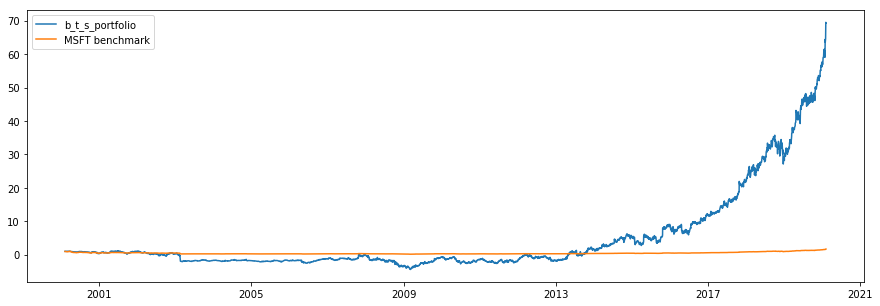

In [13]:
# Plotting MSFT benchmark and portfolio cumulative daily returns to understand b_t_s trade strategy performance
plt.figure(figsize=(15,5))
b_t_s_portfolio_daily_ret=b_t_s_perf.portfolio_value.pct_change()
MSFT_daily_ret=b_t_s_perf.MSFT.pct_change()

plt.plot((1+b_t_s_portfolio_daily_ret).cumprod())
plt.plot((1+MSFT_daily_ret).cumprod())

plt.legend(('b_t_s_portfolio', 'MSFT benchmark'), loc=0)

plt.show()

# Summary on b_t_s strategy (buy and hold stock, long term):

-Strategy would not be profitable in early to mid years as portfolio returns remains below the MSFT benchmark.

-Strategy would be profitable only in late years if investor decides to stick to the b_t_s strategy despite lower early mid years returns as portfolio returns rises around after year 2013

-Valid as a long term strategy.

### 2.2) Aroon (up/down) strategy (aroon)

In [14]:
from zipline.api import order, order_target_percent, record, symbol, set_benchmark, get_open_orders 
import zipline
from datetime import datetime

# nanargmax extracts index of max value excluding any NaN values
# nanargmin extracts index of min value excluding any NaN values
from zipline.utils.math_utils import (
    nanargmax,
    nanargmin,
)

def initialize_aroon(context, window_length=42):
    set_benchmark(symbol("MSFT_day"))
    context.stock=symbol("MSFT_day")
    context.window=window_length
    context.counter=0
    context.hold=0
    
def handle_data_aroon(context, data):
    # Example strategy
    # Aroon_up: Extract index of (max 'high' price of stock of the window_length), then multiplied by*100, divided by window_length-1
    # Aroon_down: Extract index of (min 'low' price of stock of the window_length), then multiplied by*100, divided by window_length-1
    # If Aroon_up>70 & Aroon_down<30, buy stock (Aroon value implies more likely strong upward price trend)
    # If Aroon_up<30 & Aroon_down>70, do nothing (Aroon value implies more likely strong downard price trend)
    
    record(MSFT=data.current(symbol('MSFT_day'), 'price'))
    context.counter=context.counter+1
    
    # If stetment staes that below code not executed unless for first 42 data points since window_length is 42
    if context.counter<42:
        return
    
    window_length = context.window
    high_date_index = nanargmax(data.history(context.stock, 'high', 42, '1d'))
    low_date_index = nanargmin(data.history(context.stock, 'low', 42, '1d'))
    
    aroon_up=(100*high_date_index)/(window_length-1)
    aroon_down=(100*low_date_index)/(window_length-1)
    
    
    open_orders=get_open_orders()
    # if statement of open_orders to ensure there is still enough cash to buy stock or else don't buy
    if context.stock not in open_orders:
        if aroon_up>70 and aroon_down<30:
            order_target_percent(context.stock, 1.0)
        
        elif aroon_up<30 and aroon_down>70:
            order_target_percent(context.stock, 0.0)
            
        else:
            pass
        
    record(MSFT=data.current(symbol("MSFT_day"), 'price'), Aroon_up=aroon_up, Aroon_down=aroon_down)

aroon_perf = zipline.run_algorithm(start=panel_1['MSFT_day'].index.min().to_pydatetime(),
                                   end=panel_1['MSFT_day'].index.max().to_pydatetime(),
                                   capital_base=100000,
                                   initialize=initialize_aroon,
                                   handle_data=handle_data_aroon,
                                   data=panel_1)
                                   
                    

C:\Users\UX330\Anaconda3\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Users\UX330\Anaconda3\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


<Figure size 432x288 with 0 Axes>

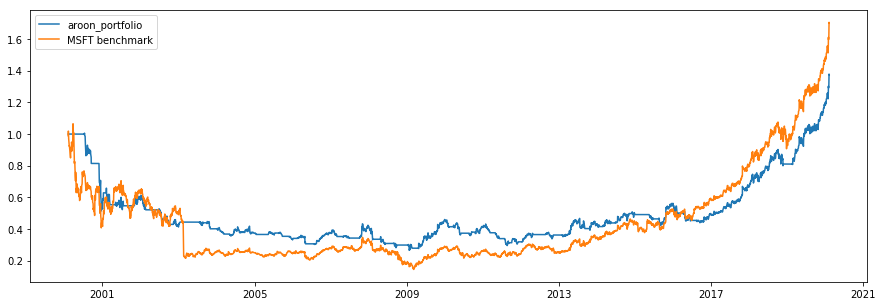

In [15]:
# Plotting MSFT benchmark and portfolio cumulative daily returns to understand aroon trade strategy performance
plt.clf()
plt.figure(figsize=(15,5))
aroon_portfolio_daily_ret=aroon_perf.portfolio_value.pct_change()
MSFT_daily_ret=aroon_perf.MSFT.pct_change()

plt.plot((1+aroon_portfolio_daily_ret).cumprod())
plt.plot((1+MSFT_daily_ret).cumprod())

plt.legend(('aroon_portfolio', 'MSFT benchmark'), loc=0)

plt.show()

# Summary on aroon_strategy (buy and hold stock):

-Strategy has performed well above the MSFT benchmark returns throughout the years even during the economy crisis(2008-2009)

-But compared to b_t_s startegy, the long term profit from would be lower (only 2.5+ for aroon, 20+ for b_t_s, that is if investor even decides to hold on to stocks despite economy crisis...)

-Might be best suited for a short/mid term strategy (since profit margin is not big but strategy returns are not extremely volatile, maintaining above the benchmark returns)

### 2.3) Dual_moving_average_crossover strategy (d_m_a_c)

In [16]:
# d_m_a_c being short notation of dual moving average crossover strategy

from zipline.api import order, order_target_percent, record, symbol, set_benchmark, get_open_orders
import zipline
from datetime import datetime


def initialize_d_m_a_c(context):
    # adds Series data formatting to results for algorithm performance comparison with benchmark('AAPL')
    set_benchmark(symbol('MSFT_day'))
    context.stock=symbol('MSFT_day')
    context.i=0

def handle_data_d_m_a_c(context, data):
    # Example strategy
    # Order MSFT stocks everyday as long as there is still enough cash(initial capital-stock hold value)
    # If long moving average > short moving average, hold stock(do nothing)
    # If long moving average < short moving average, buy stock
    
    record(MSFT=data.current(symbol('MSFT_day'), 'price'))
    
    context.i=context.i+1

    # If statement states that below code not executed for first 250 data points since largest window_length os 250
    if context.i<250:
        #print(context.i)
        return
    
    msft_smavg = data.history(context.stock, 'price', bar_count=50, frequency="1d").mean()
    msft_lmavg = data.history(context.stock, 'price', bar_count=250, frequency="1d").mean()
    
    open_orders = get_open_orders()
    
    if context.stock not in open_orders:
        if msft_smavg>msft_lmavg:
            order_target_percent(context.stock, 1.0)
    
        elif msft_smavg<msft_lmavg:
            order_target_percent(context.stock, 0.0)
    
    record(MSFT=data.current(symbol('MSFT_day'), 'price'), short_mavg=msft_smavg, long_mavg=msft_lmavg)

d_m_a_c_perf = zipline.run_algorithm(start=panel_1['MSFT_day'].index.min().to_pydatetime(),
                      end=panel_1['MSFT_day'].index.max().to_pydatetime(),
                      capital_base=100000,
                      initialize=initialize_d_m_a_c,
                      handle_data=handle_data_d_m_a_c,
                      data=panel_1)

C:\Users\UX330\Anaconda3\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
C:\Users\UX330\Anaconda3\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,


In [17]:
# Note that first 250 days of output return data would be NaN or zero as long_mvag window length is 250
# So would the ending_cash remain the same for the first 250 day period
d_m_a_c_perf[:100]

,MSFT,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-02-04 21:00:00+00:00,108.00,NaN,0.0,NaN,0.034780,NaN,NaN,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,1,[],0.0
2000-02-07 21:00:00+00:00,106.87,0.0,0.0,0.0,0.023953,0.507852,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,2,[],0.0
2000-02-08 21:00:00+00:00,110.00,0.0,0.0,0.0,0.053943,0.391923,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,3,[],0.0
2000-02-09 21:00:00+00:00,109.44,0.0,0.0,0.0,0.048577,0.368255,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,4,[],0.0
2000-02-10 21:00:00+00:00,106.56,0.0,0.0,0.0,0.020983,0.419760,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,5,[],0.0
2000-02-11 21:00:00+00:00,104.87,0.0,0.0,0.0,0.004791,0.397825,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,6,[],0.0
2000-02-14 21:00:00+00:00,101.75,0.0,0.0,0.0,-0.025103,0.407499,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,7,[],0.0
2000-02-15 21:00:00+00:00,100.00,0.0,0.0,0.0,-0.041870,0.385201,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,8,[],0.0
2000-02-16 21:00:00+00:00,100.19,0.0,0.0,0.0,-0.040050,0.362208,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,9,[],0.0
2000-02-17 21:00:00+00:00,99.69,0.0,0.0,0.0,-0.044840,0.341511,0.0,0.0,100000.0,0.0,...,NaN,0.0,0,NaN,100000.0,0.0,0.0,10,[],0.0


In [18]:
# starting_cash-ending_cash=capital_used
d_m_a_c_perf[['starting_cash', 'ending_cash', 'capital_used']][350:360]

,starting_cash,ending_cash,capital_used
2001-06-26 20:00:00+00:00,7.72956,7.72956,0.0
2001-06-27 20:00:00+00:00,7.72956,7.72956,0.0
2001-06-28 20:00:00+00:00,7.72956,7.72956,0.0
2001-06-29 20:00:00+00:00,7.72956,7.72956,0.0
2001-07-02 20:00:00+00:00,7.72956,7.72956,0.0
2001-07-03 17:00:00+00:00,7.72956,7.72956,0.0
2001-07-05 20:00:00+00:00,7.72956,7.72956,0.0
2001-07-06 20:00:00+00:00,7.72956,7.72956,0.0
2001-07-09 20:00:00+00:00,7.72956,7.72956,0.0
2001-07-10 20:00:00+00:00,7.72956,7.72956,0.0


<Figure size 432x288 with 0 Axes>

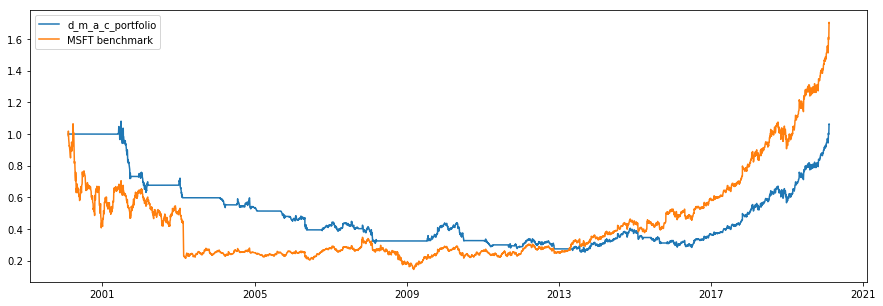

In [19]:
# Plotting MSFT benchmark and portfolio cumulative daily returns to understand d_m_a_c_trade strategy long term performance
plt.clf()
plt.figure(figsize=(15,5))
d_m_a_c_portfolio_daily_ret=d_m_a_c_perf.portfolio_value.pct_change()
MSFT_daily_ret=d_m_a_c_perf.MSFT.pct_change()

plt.plot((1+d_m_a_c_portfolio_daily_ret).cumprod())
plt.plot((1+MSFT_daily_ret).cumprod())

plt.legend(('d_m_a_c_portfolio','MSFT benchmark'), loc=0)

plt.show()

# Summary on d_m_a_c_strategy (buy and hold stock):

-Strategy has performed average with returns being only slightly above MSFT benchmark returns throughout the years, returns are practically a little above benchmark returns during economy crisis(2008-2009)

-The strategy then performed poorly lately by rising slower than MSFT benchmark returns

-In short, this strategy would not be suitable for this stock as a long term strategy.

### 2.4) Portfolio of Assets (Diversified_portfolio strategy, d_p)

In [20]:
# Choose to extract these stock data now because maximum API call frequency is 5 per minute for free version
# Note: This strategy being similar to investing all you can at start date of data unlike previous strategies
# Portfolio now consists of MSFT, CAT, AMZN, KO stock data
# amzn=Amazon, coke=Coke

amzn_day, meta_data=ts.get_daily(symbol='AMZN', outputsize='full')
amzn_intra, meta_data=ts.get_intraday(symbol='AMZN', interval='5min', outputsize='full')
coke_day, meta_data=ts.get_daily(symbol='COKE', outputsize='full')
coke_intra, meta_data=ts.get_intraday(symbol='COKE', interval='5min', outputsize='full')

In [21]:
# Reshape columns to only having close prices

a=msft_day; b=msft_intra; c=cat_day; d=cat_intra
e=amzn_day; f=amzn_intra; g=coke_day; h=coke_intra
stock_data=[a,b,c,d,e,f,g,h]

def reshape_column(all_stocks):
    for stock in all_stocks:
        stock.drop(['5. volume', '1. open', '3. low', '2. high'], axis=1, inplace=True)

reshape_column(stock_data)

In [22]:
# Data display
amzn_day.head()

,4. close
date,
2000-02-04,78.56
2000-02-07,75.00
2000-02-08,83.13
2000-02-09,80.25
2000-02-10,76.19


In [23]:
# Understading correlations between stocks from different stock sectors
# msft~IT sector, cat~Industrial sector, amzn~Consumer Discretionary sector, coke~Consumer Staples sector
# Details at: https://www.timothysykes.com/blog/different-stock-sectors/

stock_close=pd.concat([msft_day['4. close'], cat_day['4. close'], amzn_day['4. close'], coke_day['4. close']], axis=1)
stock_close.columns=['MSFT close', 'CAT close', 'AMZN close', 'COKE close']
stock_close.corr()

# Comments:
# Both AMZN and COKE seemed o be quite closely (+) correlated
# Second in line would be AMZN and MSFT
# Among all stocks, MSFT and CAT are least correlated

,MSFT close,CAT close,AMZN close,COKE close
MSFT close,1.000000,0.528683,0.843949,0.786164
CAT close,0.528683,1.000000,0.791192,0.685811
AMZN close,0.843949,0.791192,1.000000,0.911879
COKE close,0.786164,0.685811,0.911879,1.000000


In [24]:
##### Assumed equal porfolio weight for each stockn (25% each), any weight distribution being possible in reality
# Add normal returns, updated weights by time period, and each stock's total value 
# with initial capital 100000 (same intial capital as previous examples for easy comparison)

weights=[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

def norm_ret_and_weight(all_stocks, weightage):
    initial_capital=100000
    for stock, weight in zip(all_stocks, weightage):
        stock['Norm returns']=stock['4. close']/stock.iloc[0]['4. close']
        stock['Weighted value']=stock['Norm returns']*weight
        stock['Total value']=stock['Weighted value']*initial_capital

norm_ret_and_weight(stock_data, weights)

In [25]:
# Data display
coke_day.head()

,4. close,Norm returns,Weighted value,Total value
date,,,,
2000-02-04,47.50,1.000000,0.250000,25000.000000
2000-02-07,47.00,0.989474,0.247368,24736.842105
2000-02-08,47.44,0.998737,0.249684,24968.421053
2000-02-09,48.66,1.024421,0.256105,25610.526316
2000-02-10,49.13,1.034316,0.258579,25857.894737


In [26]:
# Now add all stock values together providing total portfolio value
port=pd.concat([msft_day['Total value'], cat_day['Total value'], amzn_day['Total value'], coke_day['Total value']], axis=1)
port.columns=['MSFT value', 'CAT value', 'AMZN value', 'COKE value']
port['Portfolio Value']=port.sum(axis=1)

# Display data
port.head()

,MSFT value,CAT value,AMZN value,COKE value,Portfolio Value
date,,,,,
2000-02-04,25000.000000,25000.000000,25000.000000,25000.000000,100000.000000
2000-02-07,25014.076577,24373.670527,23867.107943,24736.842105,97991.697152
2000-02-08,25792.980480,24225.951312,26454.302444,24968.421053,101441.655289
2000-02-09,24399.399399,23121.011581,25537.805499,25610.526316,98668.742795
2000-02-10,24868.618619,22488.773340,24245.799389,25857.894737,97461.086084


In [27]:
# Standard deviation of returns

print('MSFT')
print((msft_day['4. close'].pct_change()).std())
print('CAT')
print((cat_day['4. close'].pct_change()).std())
print('AMZN')
print((amzn_day['4. close'].pct_change()).std())
print('COKE')
print((coke_day['4. close'].pct_change()).std())
print('Port')
print((port['Portfolio Value'].pct_change()).std())

# Comments:
# Diversified portfolio has lowest std, with AMZN having highest std

MSFT
0.020138139806137163
CAT
0.02117967557105783
AMZN
0.03248046221320595
COKE
0.019670461731324994
Port
0.016053478602521338


In [28]:
# Daily(expected) returns

print('MSFT')
print((msft_day['4. close'].pct_change()).mean())
print('CAT')
print((cat_day['4. close'].pct_change()).mean())
print('AMZN')
print((amzn_day['4. close'].pct_change()).mean())
print('COKE')
print((coke_day['4. close'].pct_change()).mean())
print('Port')
print((port['Portfolio Value'].pct_change()).mean())

# Comments:
# Diversified portfolio has higher daily returns comoared to MSFT stock, with AMZN the highest daily returns

MSFT
0.00032270531569951005
CAT
0.00047056042464104837
AMZN
0.0011661883934634815
COKE
0.0005442910107706095
Port
0.0005718611798097538


In [29]:
# Sharpe Ratio, assuming risk-free rate being 0

print('MSFT')
print((msft_day['4. close'].pct_change(1)).mean()/msft_day['4. close'].pct_change(1).std())

print('CAT')
print((cat_day['4. close'].pct_change(1)).mean()/cat_day['4. close'].pct_change(1).std())

print('AMZN')
print((amzn_day['4. close'].pct_change(1)).mean()/amzn_day['4. close'].pct_change(1).std())

print('COKE')
print((coke_day['4. close'].pct_change(1)).mean()/coke_day['4. close'].pct_change(1).std())

print('Port')
print((port['Portfolio Value'].pct_change(1)).mean()/port['Portfolio Value'].pct_change(1).std())

# Comments:
# Diversified portfolio has higher Sharpe Ratio than MSFT stock, only slightly lower than AMZN sharpe ratio

MSFT
0.016024584137665217
CAT
0.022217546395473232
AMZN
0.03590430412623042
COKE
0.027670474552401177
Port
0.03562225944724143


<Figure size 1152x432 with 0 Axes>

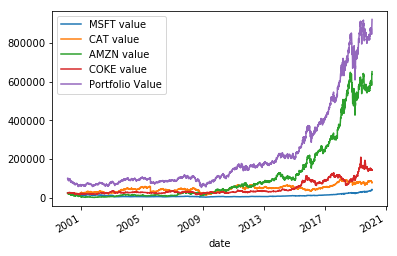

In [30]:
# Plot value proportion of each stock and total portfolio
plt.figure(figsize=(16,6))
port.plot()

<Figure size 432x288 with 0 Axes>

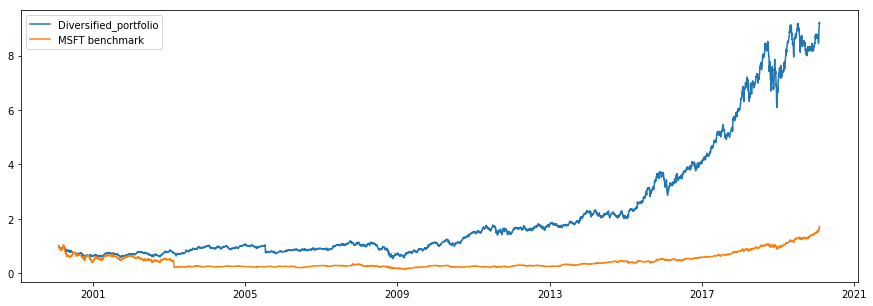

In [31]:
# Plotting MSFT benchmark and portfolio cumulative daily returns to understand d_s_trade strategy long term performance
# Below graphical representation would be same even with 100000 initia1 capital investment in MSFT stock compared 
# to diversification strategy since pct_change() being % change (returns)

plt.clf()
plt.figure(figsize=(15,5))
port_daily_ret=port['Portfolio Value'].pct_change()
MSFT_daily_ret=msft_day['4. close'].pct_change()

plt.plot((1+port_daily_ret).cumprod())
plt.plot((1+MSFT_daily_ret).cumprod())

plt.legend(('Diversified_portfolio','MSFT benchmark'), loc=0)

plt.show()

# Summary on d_p strategy (buy all you can at start date):

-Strategy has performed well with returns being above MSFT benchmark throughout the whole period even during the 2008 economice crisis.

-In addition to the lower std, higher daily(expected) returns, and higher Sharpe Ratio compared to MSFT stock until recent date, it shows that diversification is also a worthy investment strategy instead of putting all eggs in one basket.

-It is also true that one would instead put all of their invetments in AMZN stock but the high std might prove to be   exteremely risky in comparison to d_p strategy but in the end it all comes down to investor's risk profile to decide investment preferences.